In [1]:
# pca_classification_lab.py
# Lab Exercise: Using PCA to Improve Classification Performance

import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

print("Dataset shape:", X.shape)
print("Target labels:", data.target_names)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ========== Without PCA ==========
start_full = time.time()

# Train classifier on full data
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train, y_train)

# Predict
y_pred_full = model_full.predict(X_test)

end_full = time.time()
acc_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy without PCA: {acc_full:.4f}")
print(f"Execution time without PCA: {end_full - start_full:.4f} seconds")

# ========== With PCA ==========
# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original dimensions: {X.shape[1]}, Reduced dimensions: {X_train_pca.shape[1]}")

start_pca = time.time()

# Train classifier on PCA-reduced data
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)

# Predict
y_pred_pca = model_pca.predict(X_test_pca)

end_pca = time.time()
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {acc_pca:.4f}")
print(f"Execution time with PCA: {end_pca - start_pca:.4f} seconds")

# Optional: Confusion matrix
print("\nConfusion Matrix with PCA:")
print(confusion_matrix(y_test, y_pred_pca))

# Optional: Classification report
print("\nClassification Report with PCA:")
print(classification_report(y_test, y_pred_pca, target_names=data.target_names))

# ==== STUDENT TASKS ====

# Task 1:
# What can you observe when PCA is applied in terms of accuracy? How can you explain the observation?
# What can you observe about the performance when PCA is applied? How can you explain the observation?
# Try different PCA settings (e.g., n_components=0.90,0.85,0.98) and observe how accuracy changes.
# What can you observe when the % variance retained changes and how can you explain the changes
# in accuracy and execution time.


Dataset shape: (569, 30)
Target labels: ['malignant' 'benign']
Accuracy without PCA: 0.9737
Execution time without PCA: 0.0552 seconds
Original dimensions: 30, Reduced dimensions: 10
Accuracy with PCA: 0.9825
Execution time with PCA: 0.0206 seconds

Confusion Matrix with PCA:
[[42  1]
 [ 1 70]]

Classification Report with PCA:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Task 01

===== No PCA =====
Accuracy: 0.9737
Execution Time: 0.0484 seconds

===== PCA with 85% Variance Retained =====
Reduced dimensions: 6
Accuracy: 0.9825
Execution Time: 0.0040 seconds

===== PCA with 90% Variance Retained =====
Reduced dimensions: 7
Accuracy: 0.9825
Execution Time: 0.0040 seconds

===== PCA with 95% Variance Retained =====
Reduced dimensions: 10
Accuracy: 0.9825
Execution Time: 0.0041 seconds

===== PCA with 98% Variance Retained =====
Reduced dimensions: 14
Accuracy: 0.9912
Execution Time: 0.0100 seconds



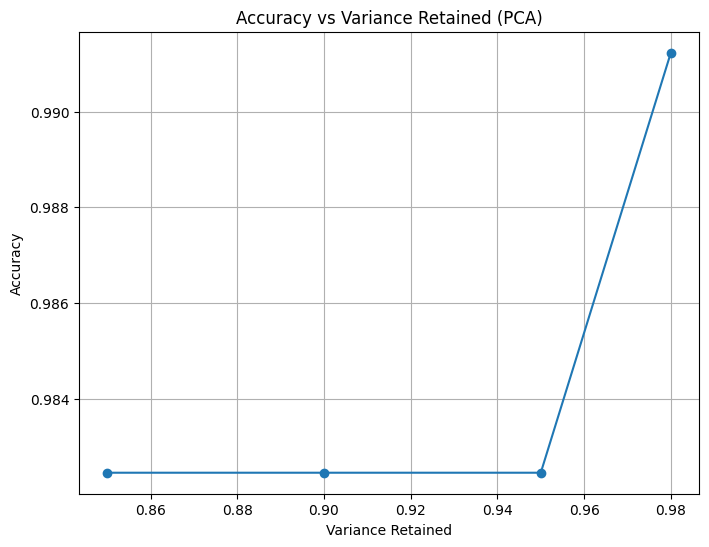

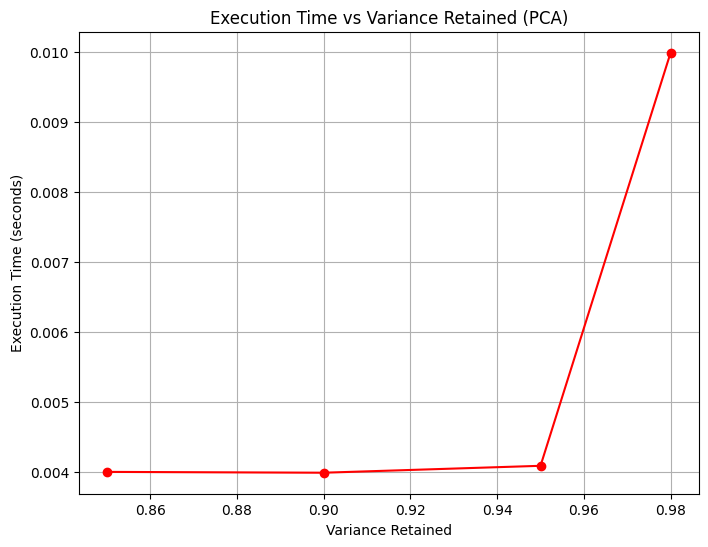

===== Confusion Matrix for 85% Variance Retained =====
[[42  1]
 [ 1 70]]

===== Confusion Matrix for 90% Variance Retained =====
[[42  1]
 [ 1 70]]

===== Confusion Matrix for 95% Variance Retained =====
[[42  1]
 [ 1 70]]

===== Confusion Matrix for 98% Variance Retained =====
[[42  1]
 [ 0 71]]



In [3]:
# pca_classification_lab_extended.py
# Extended Lab: PCA with Multiple Variance Retention Settings + Plot

import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ========== Without PCA ==========
start_full = time.time()
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
end_full = time.time()
acc_full = accuracy_score(y_test, y_pred_full)
print("===== No PCA =====")
print(f"Accuracy: {acc_full:.4f}")
print(f"Execution Time: {end_full - start_full:.4f} seconds\n")

# Store results for plotting
results = {
    'variance_retained': [],
    'accuracy': [],
    'execution_time': [],
    'confusion_matrices': []
}

# ========== With PCA (multiple settings) ==========
for var in [0.85, 0.90, 0.95, 0.98]:
    print(f"===== PCA with {int(var * 100)}% Variance Retained =====")
    pca = PCA(n_components=var)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    print(f"Reduced dimensions: {X_train_pca.shape[1]}")

    start_pca = time.time()
    model_pca = LogisticRegression(max_iter=1000)
    model_pca.fit(X_train_pca, y_train)
    y_pred_pca = model_pca.predict(X_test_pca)
    end_pca = time.time()

    acc_pca = accuracy_score(y_test, y_pred_pca)
    print(f"Accuracy: {acc_pca:.4f}")
    print(f"Execution Time: {end_pca - start_pca:.4f} seconds\n")

    # Store results
    results['variance_retained'].append(var)
    results['accuracy'].append(acc_pca)
    results['execution_time'].append(end_pca - start_pca)
    results['confusion_matrices'].append(confusion_matrix(y_test, y_pred_pca))

# Plot accuracy vs variance retained
plt.figure(figsize=(8, 6))
plt.plot(results['variance_retained'], results['accuracy'], marker='o')
plt.xlabel("Variance Retained")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Variance Retained (PCA)")
plt.grid(True)
plt.show()

# Plot execution time vs variance retained
plt.figure(figsize=(8, 6))
plt.plot(results['variance_retained'], results['execution_time'], marker='o', color='red')
plt.xlabel("Variance Retained")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Variance Retained (PCA)")
plt.grid(True)
plt.show()

# Optional: Display confusion matrices for each PCA setting
for i, var in enumerate([0.85, 0.90, 0.95, 0.98]):
    print(f"===== Confusion Matrix for {int(var * 100)}% Variance Retained =====")
    print(results['confusion_matrices'][i])
    print()
